In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, spectrogram

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The Math you will want is:
Black Hole Schwarzchild Radius
$$R_{g} = \frac{2 G M }{c ^2}$$

The innermost stable circular orbit (ISCO) is:
$$R_{ISCO}=3 R_g$$

This is the closest orbit we can get gravitational waves from the inspiral phase.

Circular period around mass M at radius R is:
$$T = \sqrt{\frac{4 \pi^2 R^3}{G M}}$$

The orbital frequency at this point is:
$$f_{orb} = 1/T$$

The gravitaional waves have the simple relation:
$$f_{GW} = 2f_{orb}$$


Some new math that will improve your work is reduced mass coordinates. That is we can describe a binary system with masses $M_1$ and $M_2$ to orbit a single imagined body of the reduced mass:

$$\mu = \frac{M_1 M_2}{M_1 + M_2}$$

Thus, $\mu$ can replace a single body $M$ in the earlier equations.

This is coded below, but you may want to modify it depending on how your project evolves.

In [2]:
unit_G = 6.67e-8
unit_c = 2.998e10
unit_Msun = 2.989e33
def calc_R_schwarz(M_suns):
    return 2 * unit_G * M_suns * unit_Msun /unit_c**2

def calc_reduced_mass(M1, M2):
    return (M1*M2)/(M1+M2)

def calc_period(M, R):
    return ((4*np.pi**2 * R**3)/(unit_G * unit_Msun * M))**(1/2)

16.363636363636363 Solar Masses
21778078.66816906 cm
f_orb =  89.4451038632067 Hz
f_GW =  178.8902077264134 Hz


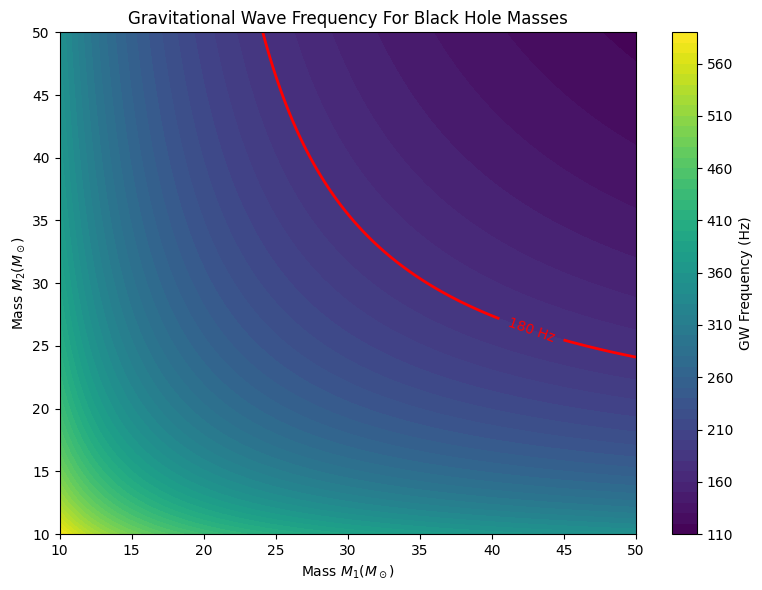

In [20]:
bh_mass1, bh_mass2 = 30, 36
reduced_mass = calc_reduced_mass(bh_mass1, bh_mass2)
R_ISCO = 3* calc_R_schwarz(reduced_mass)
orbital_freq = 1/calc_period(reduced_mass, R_ISCO)
GW_freq = 2 * orbital_freq

print(reduced_mass, "Solar Masses")
print(R_ISCO, "cm")
print("f_orb = ", orbital_freq, "Hz")
print("f_GW = ", GW_freq, "Hz")

def calc_GW_freq(M1, M2):
    red_mass = calc_reduced_mass(M1, M2)
    risco = 3 * calc_R_schwarz(red_mass)
    orb_freq = 1/calc_period(red_mass, risco)
    gw_freq = 2 * orb_freq
    return gw_freq

m1_vals = np.linspace(10, 50, 100)
m2_vals = np.linspace(10, 50, 100)
f = 180

M1, M2 = np.meshgrid(m1_vals, m2_vals)

# Calculate GW frequency grid
GW_freq = calc_GW_freq(M1, M2)

# Plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(M1, M2, GW_freq, levels=50, cmap='viridis')
cbar = plt.colorbar(cp, label='GW Frequency (Hz)')

# Add contour line for specific frequency
contour = plt.contour(M1, M2, GW_freq, levels=[f], colors='red', linewidths=2)
plt.clabel(contour, fmt={f: f'{f} Hz'}, inline=True, fontsize=10)

plt.xlabel(r'Mass $M_1 (M_\odot)$')
plt.ylabel(r'Mass $M_2 (M_\odot)$')
plt.title('Gravitational Wave Frequency For Black Hole Masses')
plt.tight_layout()
plt.savefig("plot_BBH_masses_2d.png") # uncomment to save
plt.show()

